<a href="https://colab.research.google.com/github/cennetb/bitirme/blob/master/cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
import os
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

In [ ]:
# Veri seti yolu
train_dir = "/content/drive/MyDrive/Colab Notebooks/output/train/cnn_rs"
test_dir = "/content/drive/MyDrive/Colab Notebooks/output/test/cnnrs"
categories = ["cancer_rs", "non_cancer_rs"]


# Örnek bir görseli kontrol etme
image_path = "/content/drive/MyDrive/Colab Notebooks/output/train/cnn_rs/cancer_rs/ISIC_0024315.jpg"
image = cv2.imread(image_path)
if image is None:
    print(f"'{image_path}' yolundan görüntü yüklenemedi. Yol veya dosya adı hatalı olabilir.")
else:
    print("Görüntü başarıyla yüklendi.")


Görüntü başarıyla yüklendi.


In [ ]:
# eğitim veri setini yükleme
# Eğitim verilerini yükleme
train_images = []
train_labels = []

for category in categories:
    path = os.path.join(train_dir, category)
    label = categories.index(category)
    for img in os.listdir(path):
        try:
            img_path = os.path.join(path, img)
            image = cv2.imread(img_path)  # RGB formatında yükle
            image = image / 255.0  # Normalizasyon
            train_images.append(image)
            train_labels.append(label)
        except Exception as e:
            print(f"Görsel yüklenirken hata oluştu: {e}")

train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
# Doğrulama verilerini yükleme
test_images = []
test_labels = []

for category in ["cancer_rs", "non_cancer_rs"]:
    path = os.path.join(test_dir, category)
    label = 0 if category == "cancer_rs" else 1
    for img in os.listdir(path):
        try:
            img_path = os.path.join(path, img)
            image = cv2.imread(img_path)  # RGB formatında yükle
            image = image / 255.0  # Normalizasyon
            test_images.append(image)
            test_labels.append(label)
        except Exception as e:
            print(f"Görsel yüklenirken hata oluştu: {e}")

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
# CNN Modeli
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 sınıf: skin_cancer ve not_skin_cancer
])

# Modeli derleme
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
history = model.fit(train_images, train_labels, epochs=1000, validation_data=(test_images, test_labels), batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.7935 - loss: 0.5072 - val_accuracy: 0.8070 - val_loss: 0.6236
Epoch 2/1000
251/251 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8041 - loss: 0.3957 - val_accuracy: 0.8070 - val_loss: 0.6167
Epoch 3/1000
251/251 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8076 - loss: 0.3751 - val_accuracy: 0.8070 - val_loss: 0.5603
Epoch 4/1000
251/251 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8021 - loss: 0.3809 - val_accuracy: 0.8070 - val_loss: 0.5027
Epoch 5/1000
251/251 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8041 - loss: 0.3864 - val_accuracy: 0.8070 - val_loss: 0.5725
Epoch 6/1000
251/251 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.8069 - loss: 0.3723 - val_accuracy: 0.8070 - val_loss: 0.6320
Epoch 7/1000
251/251 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8084 - loss: 0.3587 - val_accuracy: 0.8070 - val_loss: 0.6381
Epoch 8/1000
251/251 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8027 - loss: 

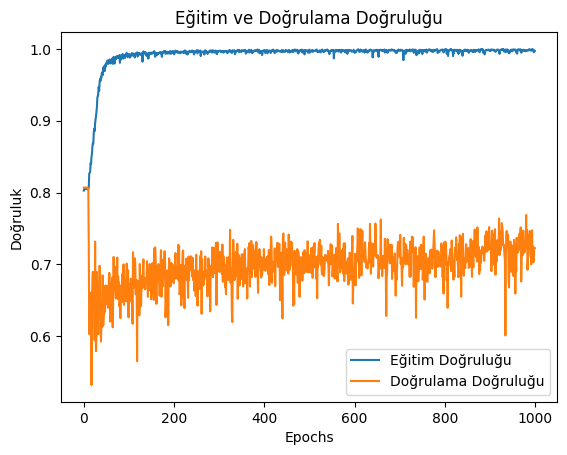

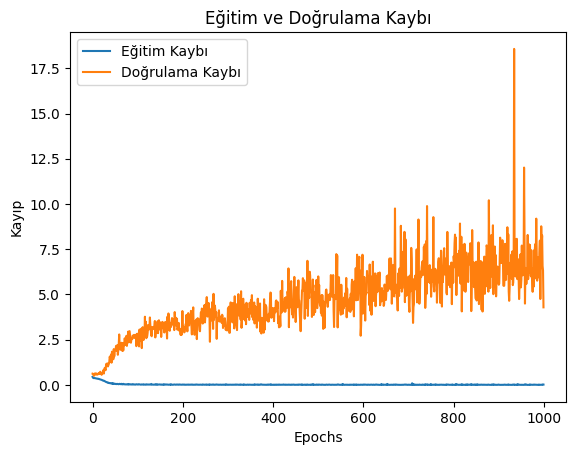

In [ ]:
# Eğitim sonuçlarını görselleştirme
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.show()

plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()
plt.title('Eğitim ve Doğrulama Kaybı')
plt.show()

# Modeli kaydetme
model.save("cilt_kanseri_tespit_modeli.h5")

In [ ]:
# Tahmin fonksiyonu
def tahmin_yap(image_path):
    try:
        image = cv2.imread(image_path)  # RGB formatında yükle
        if image is None:
            return f"Görüntü yüklenemedi: {image_path}"
        image = image / 255.0
        prediction = model.predict(image)
        class_index = np.argmax(prediction)
        class_name = categories[class_index]
        return class_name
    except Exception as e:
        return f"Hata oluştu: {e}"

# Örnek tahmin
sonuc = tahmin_yap("/content/drive/MyDrive/Colab Notebooks/ph2/trainx_rs/X_img_104.bmp")
print(f"Tahmin edilen sınıf: {sonuc}")


Tahmin edilen sınıf: Hata oluştu: Exception encountered when calling Sequential.call().

Cannot take the length of shape with unknown rank.

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None


In [ ]:


# Test verileri üzerinde tahminler yap
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Sınıflandırma raporu
print("Sınıflandırma Raporu:")
print(classification_report(test_labels, predicted_labels, target_names=categories))

# Ek metrikler
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

print(f"Doğruluk (Accuracy): {accuracy}")
print(f"Duyarlılık (Precision): {precision}")
print(f"Hatırlama (Recall): {recall}")
print(f"F1 Skoru: {f1}")


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Sınıflandırma Raporu:


NameError: name 'classification_report' is not defined